# Estimating the average Cosmic Ray backgound at high redshifts

The primary source of cosmic rays at high redshifts will be from supernova (SN) explosions.  Given an estimate of the Star Formation Rate Density (SFRD), we can calculate the corresponding energy density of cosmic rays in space ($u_{\rm \small CR}$) by assuming values for the number of SNe produced per unit of star-forming material, the typical energy of a SN, and the fraction of a SN's explosion energy that goes into cosmic rays:

$$u_{\rm \small CR}(z) = f_{\rm \small CR} f_{\rm \small SN} E_{\rm \small SN} \Psi_{*}(z) \; t_{\rm \small H}(z) (1+z)^3,$$

where $$f_{\rm \small CR} \equiv {\rm fraction \; of \; SN \; energy \; going \; into \; cosmic \; rays}$$

$$f_{\rm \small SN} \equiv {\rm number \; of \; SN \; occuring \; per \; solar \; mass  \; of \; star-forming \; material}$$

$$E_{\rm \small SN} \equiv {\rm typical \; SN \; explosion \; energy}$$

$$\Psi_*(z) \equiv {\rm comoving \; SFR \; in \;M}_{\odot} \; {\rm yr}^{-1} \; {\rm Mpc}^{-3}$$

$$t_{\rm \small H} \equiv {\rm Hubble \; time \; at \; redshift \;}z$$

Here, $t_{\rm \small H}$ accounts for the time X-rays have had to propagate through the universe since their creation, and the factor of $(1+z)^3$ is required to convert from a comoving SFRD to a physical X-ray energy density.

## Assumptions:

We assume that each SN producing star lives for a relatively brief time before dying as a core-collapse SN with $E_{\rm \small SN} = 10^{51}\,{\rm erg}$.

In [1]:
E_sn = 1e51

We assume one SN is produced per $50\,M_{\odot}$ of stars formed.

In [2]:
f_sn = .02 # == 1/50

We assume ten percent of each SN's energy is ultimately released as Cosmic Rays.

In [3]:
f_cr = .1

## Assumed Star Formation Rate Density:

We use the star formation rate density determined by Greif & Bromm (2006).  To do so we load the file 'sfr_GB06.dat' containing the comoving SFR as a function of redshift in units of solar masses per year per cubic Mpc. This was extracted from Figure 7 (dotted line) of GB06 and extended to redshift 100 using a log-linear extrapolation.

In [4]:
import os
import astropy
from astropy import units
from astropy.io import ascii
from astropy.cosmology import WMAP9
fname = '../sfr/sfr_GB06.dat'
sfdata = ascii.read(fname)
z = sfdata['z']
sfr = sfdata['sfr']

/home/jhummel/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Calculate $u_{\rm \small CR}$:

First calculate the hubble time for each redshift point and convert it to years.

In [5]:
t_H = WMAP9.age(z) #returns age of universe in Gyr

tH = t_H.to(units.yr).value #just want the array, not the unit information
z3 = (1+z)**3 # (1+z)^3 (defined for convenience)

Now calculate $u_{\rm \small CR}$ and convert to cgs units.

In [6]:
# CR energy density (erg/Mpc^3)
u_cr = f_cr * f_sn * E_sn * tH * sfr * z3
# Convert to cgs units (Mpc --> cm)
u_cr /= (3.08e24)**3

Now let's make some plots.

In [7]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('text', usetex=True)
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = (12,10)
import seaborn as sns

/home/jhummel/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/jhummel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


First lets plot the SFR as a function of redshift, overlaying the numbers Athena used in red:

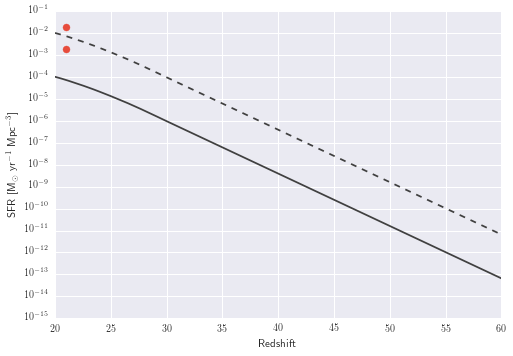

In [8]:
#plt.rc('font', size=18.)
plt.semilogy(z,sfr, '.25')
plt.semilogy(z,100*sfr, c='.25', ls='--')
plt.scatter([21]*2, [2e-2, 2e-3],s=50, color="#e74c3c")
plt.xlim(20,60)
plt.ylim(1e-15,.1)
plt.xlabel('Redshift')
plt.ylabel(r'SFR [M$_{\odot}$ yr$^{-1}$ Mpc$^{-3}$]')
plt.savefig('figures/sfr.png')

Now plot u<sub>CR</sub> as a function of redshift:

In [9]:
tH21 = WMAP9.age(21).to(units.yr).value

In [10]:
import numpy as np
def find_closest(A, target):
    #A must be sorted
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return idx

/home/jhummel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


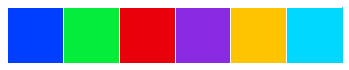

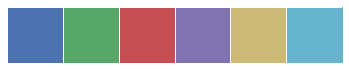

In [11]:
#deep=["#4C72B0", "#55A868", "#C44E52","#8172B2", "#CCB974", "#64B5CD"]
current_palette = sns.color_palette()
sns.palplot(sns.palettes.color_palette("bright"))
sns.palplot(current_palette)

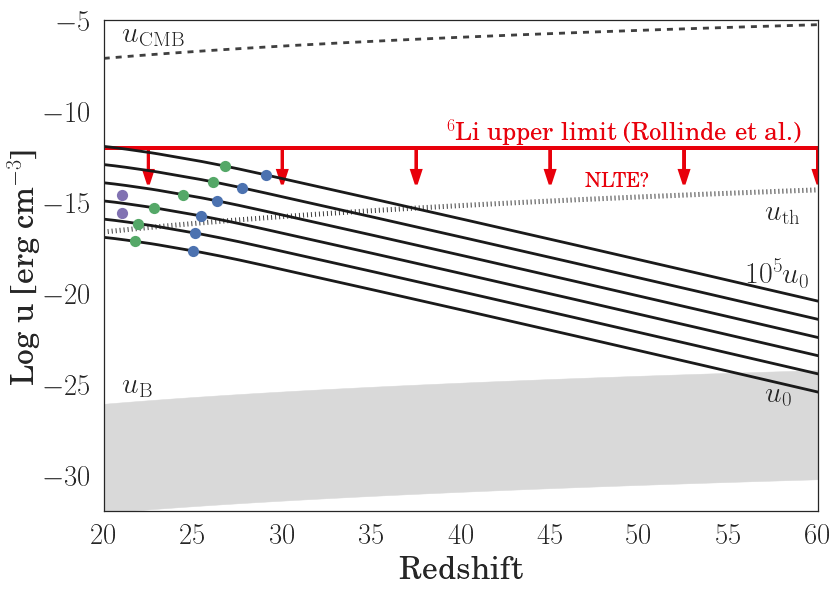

In [22]:
sns.set(context='poster', style='white', font='serif', font_scale=1.8)
gray = '.25'
### CMB Energy density
plt.plot(z,np.log10(7.56e-15 * (2.73 * (1+z))**4), gray, ls='--')
### Magnetic Field Energy Density
plt.fill_between(z, np.log10((1e-18*(1+z)**2)**2 / (8*np.pi)), np.log10((1e-15*(1+z)**2)**2 / (8*np.pi)), color='.85')
#plt.plot(z,np.log10((1e-18*(1+z)**2)**2 / (8*np.pi)), 'k-.')
#plt.plot(z,np.log10((1e-15*(1+z)**2)**2 / (8*np.pi)), 'k:')
### Thermal energy density
plt.plot(z, np.log10(5.689e-24 * (1+z)**5), gray, ls=':', lw=5)
### Rollinde et al. (2006) upper limit on CR energy density
#plt.axhspan(-12, -10, color="#E8000B", lw=10)
plt.axhline(-12, color="#E8000B", lw=4, ls='-')
for zpos in [22.5,30,37.5,45,52.5,60]:
    plt.arrow(zpos, -12, 0, -2., shape='full', lw=3, length_includes_head=True, head_width=.5, fc="#E8000B", ec="#E8000B")

lc = '.1'
plt.plot(z,np.log10(u_cr), lc)
plt.plot(z,np.log10(u_cr) + 1, lc)
plt.plot(z,np.log10(u_cr) + 2, lc)
plt.plot(z,np.log10(u_cr) + 3, lc)
plt.plot(z,np.log10(u_cr) + 4, lc)
plt.plot(z,np.log10(u_cr) + 5, lc)

#Halo 1 Collapse Redshifts
#plt.plot([20,25.0240481871],[np.log10(u_cr[find_closest(z,25.0240481871)])]*2, c="#4C72B0", ls=':')
plt.plot(25.0240481871,np.log10(u_cr[find_closest(z,25.0240481871)]), 'o', c="#4C72B0")
#plt.plot([20,25.0943467616],[np.log10(u_cr[find_closest(z,25.0943467616)])+1]*2, c="#4C72B0", ls=':')
plt.plot(25.0943467616,np.log10(u_cr[find_closest(z,25.0943467616)])+1, 'o', c="#4C72B0")
#plt.plot([20,25.4341491806],[np.log10(u_cr[find_closest(z,25.4341491806)])+2]*2, c="#4C72B0", ls=':')
plt.plot(25.4341491806,np.log10(u_cr[find_closest(z,25.4341491806)])+2, 'o', c="#4C72B0")
#plt.plot([20,26.3209400982],[np.log10(u_cr[find_closest(z,26.3209400982)])+3]*2, c="#4C72B0", ls=':')
plt.plot(26.3209400982,np.log10(u_cr[find_closest(z,26.3209400982)])+3, 'o', c="#4C72B0")
#plt.plot([20,27.7400906358],[np.log10(u_cr[find_closest(z,27.7400906358)])+4]*2, c="#4C72B0", ls=':')
plt.plot(27.7400906358,np.log10(u_cr[find_closest(z,27.7400906358)])+4, 'o', c="#4C72B0")
#plt.plot([20,29.0965640078],[np.log10(u_cr[find_closest(z,29.0965640078)])+5]*2, c="#4C72B0", ls=':')
plt.plot(29.0965640078,np.log10(u_cr[find_closest(z,29.0965640078)])+5, 'o', c="#4C72B0")
#plt.axvline(25.04, color="#4C72B0")

#Halo  Collapse Redshifts
#plt.plot([20,21.7321784371 ],[np.log10(u_cr[find_closest(z,21.7321784371 )])]*2, c="#55A868", ls=':')
plt.plot(21.7321784371 ,np.log10(u_cr[find_closest(z,21.7321784371 )]), 'o', c="#55A868")
#plt.plot([20,21.9363564265],[np.log10(u_cr[find_closest(z,21.9363564265)])+1]*2, c="#55A868", ls=':')
plt.plot(21.9363564265,np.log10(u_cr[find_closest(z,21.9363564265)])+1, 'o', c="#55A868")
#plt.plot([20,22.8077127423],[np.log10(u_cr[find_closest(z,22.8077127423)])+2]*2, c="#55A868", ls=':')
plt.plot(22.8077127423,np.log10(u_cr[find_closest(z,22.8077127423)])+2, 'o', c="#55A868")
#plt.plot([20,24.4555123033],[np.log10(u_cr[find_closest(z,24.4555123033)])+3]*2, c="#55A868", ls=':')
plt.plot(24.4555123033,np.log10(u_cr[find_closest(z,24.4555123033)])+3, 'o', c="#55A868")
#plt.plot([20,26.139455084],[np.log10(u_cr[find_closest(z,26.139455084)])+4]*2, c="#55A868", ls=':')
plt.plot(26.139455084,np.log10(u_cr[find_closest(z,26.139455084)])+4, 'o', c="#55A868")
#plt.plot([20,26.7957550695],[np.log10(u_cr[find_closest(z,26.7957550695)])+5]*2, c="#55A868", ls=':')
plt.plot(26.7957550695,np.log10(u_cr[find_closest(z,26.7957550695)])+5, 'o', c="#55A868")
#plt.axvline(21.70209360076398, color="#55A868")
### Athena's Cases
plt.plot([21]*2,[np.log10(f_cr * f_sn * E_sn * tH21 * 2e-3 * 22**3 / (3.08e24)**3), 
                 np.log10(f_cr * f_sn * E_sn * tH21 * 2e-2 * 22**3 / (3.08e24)**3)], 'o', color="#8172B2")

### Annotations
plt.text(21, -6, r"$u_{\rm \tiny CMB}$", ha='left', va='center', size=30)
plt.text(59, -11.85, r"$^6$Li upper limit (Rollinde et al.)", ha='right', va='bottom', size=25, color="#E8000B")
plt.text(48.75, -14.35, r"NLTE?", ha='center', va='bottom', size=20, color="#E8000B")
plt.text(59, -15, r"$u_{\rm \tiny th}$", ha='right', va='top', size=30)
plt.text(21, -26, r"$u_{\rm \tiny B}$", ha='left', va='bottom', size=30)
plt.text(58.5, -25, r'$u_0$', ha='right', va='top', size=30)
plt.text(59.6, -20, r'$10^5 u_0$', ha='right', va='bottom', size=30)




plt.xlim(20,60)
plt.ylim(-32,-5)
plt.xlabel('Redshift')
plt.ylabel(r'Log u [erg cm$^{-3}$]')
plt.savefig('figures/u_cr.pdf', bbox_inches='tight')

In [43]:
(45+52.5)/2

48.75

Save this to the file 'jxr.dat' for loading into GADGET.

In [13]:
udata = np.zeros((z.size,2))
udata[:,0] = z[::-1]
udata[:,1] = u_cr[::-1]
np.savetxt('ucr.dat', udata, fmt='%.8e %.8e')

In [4]:
WMAP9.H(20)

<Quantity 3582.5064146285736 km / (Mpc s)>

In [4]:
WMAP9.age(20).  to('s')

<Quantity 5711435729214843.0 s>

In [5]:
astropy.constants.c.to('km/s')

<Quantity 299792.458 km / s>

In [6]:
(.046*astropy.constants.c / WMAP9.H(20)).to(units.kpc)

<Quantity 3849.3868459492387 kpc>

In [7]:
(.046*astropy.constants.c * WMAP9.age(20)).to(units.kpc)

<Quantity 2552.5442725349462 kpc>

In [16]:
(.046**2 * astropy.constants.c * WMAP9.age(20)).to(units.kpc) / (1*units.kpc)

<Quantity 117.41703653660751>